# CERR Segmentation Routines in Slicer 

### Pull imaging data from Slicer viewer and import to CERR for DL segmentation analysis

Setup and module load for Octave oct2py interface

In [1]:
import os
import numpy as np

In [2]:
import JupyterNotebooksLib as slicernb

In [3]:
octave_cli_path = 'C:/Program Files/GNU Octave/Octave-6.2.0/mingw64/bin/octave-cli.exe'
os.environ['OCTAVE_EXECUTABLE'] = octave_cli_path

In [4]:
from oct2py import octave
from oct2py import Struct

In [5]:
#import octave add-on packages
octave.eval('pkg load image')
octave.eval('pkg load io')
octave.eval('pkg load statistics')

'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function
'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function
'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function


In [6]:
javaPath = r'C:\Program Files\Java\jre1.8.0_291\bin\server'
octave.setenv('JAVA_HOME',javaPath)

In [7]:
cerrPath = r'Y:\Eve\sliCERR\CERRx\CERR'

In [8]:
octave.push('cerrPath',cerrPath)

In [9]:
octave.addpath(cerrPath)

'.;Y:\\Eve\\sliCERR\\CERR;Y:\\Eve\\sliCERR\\CERR\\CERR_core;Y:\\Eve\\sliCERR\\CERR\\CERR_core\\Extras;Y:\\Eve\\sliCERR\\CERR\\CERR_core\\Extras\\faceOffBeta;C:\\Program Files\\GNU Octave\\Octave-6.2.0\\mingw64\\share\\octave\\packages\\statistics-1.4.2\\base;C:\\Program Files\\GNU Octave\\Octave-6.2.0\\mingw64\\share\\octave\\packages\\statistics-1.4.2\\distributions;C:\\Program Files\\GNU Octave\\Octave-6.2.0\\mingw64\\share\\octave\\packages\\statistics-1.4.2\\models;C:\\Program Files\\GNU Octave\\Octave-6.2.0\\mingw64\\share\\octave\\packages\\statistics-1.4.2\\tests;C:\\Program Files\\GNU Octave\\Octave-6.2.0\\mingw64\\share\\octave\\packages\\statistics-1.4.2;C:\\Program Files\\GNU Octave\\Octave-6.2.0\\mingw64\\lib\\octave\\packages\\io-2.6.3\\x86_64-w64-mingw32-api-v55;C:\\Program Files\\GNU Octave\\Octave-6.2.0\\mingw64\\share\\octave\\packages\\io-2.6.3;C:\\Program Files\\GNU Octave\\Octave-6.2.0\\mingw64\\lib\\octave\\packages\\image-2.12.0\\x86_64-w64-mingw32-api-v55;C:\\Pro

In [10]:
octave.addToPath(cerrPath)

In [11]:
planCFileName = r'X:\Eve\Test_Orientations\0617-259694_20000909\scans\0617-259694.mat';
octave.push('planCFileName',planCFileName)
octave.eval('planC = loadPlanC(planCFileName);')

'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function
CERR>>  Loading 0617-259694.mat...
CERR>>  Loaded 0617-259694.mat...


In [12]:
octave.eval('indexS = planC{end};')

'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function


## Import scans

In [13]:
octave.eval('scanCount = numel(planC{indexS.scan});')

'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function


In [14]:
scanCount = octave.pull('scanCount')

In [15]:
scanList = []

In [16]:
for i in range(int(scanCount)):
        octave.push('i',i+1)
        octave.eval('scanType = planC{indexS.scan}(i).scanType;')
        octave.eval('[affineMat,scan3M_RAS,voxel_size] = getPlanCAffineMat(planC, i, 1);')
        octave.eval("qOffset = affineMat(1:3,end)';")
        octave.eval('scaleMat = eye(3); scaleMat(1,1) = 1/voxel_size(1); scaleMat(2,2) = 1/voxel_size(2); scaleMat(3,3) = 1/voxel_size(3);ijkMat = scaleMat * affineMat(1:3,1:3);')
        scanType, ijkMat, qOffset, scan3M_RAS, voxel_size = octave.pull(['scanType','ijkMat','qOffset','scan3M_RAS','voxel_size'])
        slicer.mrmlScene.AddNewNodeByClass("vtkMRMLScalarVolumeNode", scanType)
        scanList.append(slicer.util.getNode(scanType))
        #volumeNode = slicer.util.getNode(scanType)
        scanList[-1].SetOrigin(qOffset[0])
        #volumeNode.SetOrigin(qOffset[0])
        scanList[-1].SetSpacing(voxel_size[0])
        #volumeNode.SetSpacing(voxel_size[0])
        scanList[-1].SetIJKToRASDirections(ijkMat)
        #volumeNode.SetIJKToRASDirections(ijkMat)
        slicer.util.updateVolumeFromArray(scanList[-1], np.swapaxes(scan3M_RAS,2,0))
        slicer.util.setSliceViewerLayers(background=scanList[-1])

'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function
'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function
'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function
'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-s

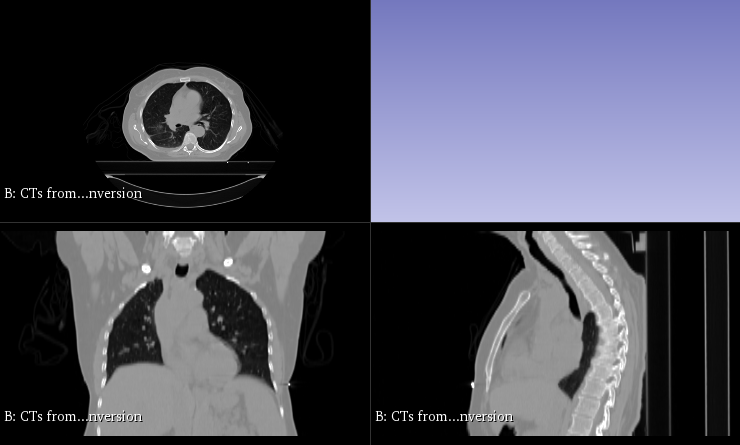

In [17]:
slicernb.ViewDisplay()

## Pull scan from mrml to CERR

Pull imaging data from the Slicer MRML scene and import to CERR

In [18]:
#Get preloaded DICOM volume node from MRML scene
volumeNode = scanList[0]

In [19]:
#Get 3x3 voxel matrix from volume node
imgVolume = np.copy(slicer.util.arrayFromVolume(volumeNode))

#Origin, image spacing
imgOrigin = volumeNode.GetOrigin()
imgSpacing = volumeNode.GetSpacing()

#Get affine matrix with direction cosines, pixdim, origin
imgMatrixVtk = vtk.vtkMatrix4x4()
volumeNode.GetIJKToRASMatrix(imgMatrixVtk)

imgMatrix = np.eye(4)
imgMatrixVtk.DeepCopy(imgMatrix.ravel(),imgMatrixVtk)

imgData = volumeNode.GetImageData()
dtype = imgData.GetScalarSize()

In [20]:
octave.push('scanName',volumeNode.GetName())
octave.push('qOffset',np.array(imgOrigin))
octave.push('pixDim',np.array(imgSpacing))
octave.push('imgVolume',imgVolume)

In [21]:
octave.eval('imV2 = permute(imgVolume,[2,3,1]);')

'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function


In [22]:
octave.eval('infoS.Offset = qOffset; infoS.PixelDimensions = pixDim; infoS.Dimensions = size(imV2); scanOffset = 0;')

'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function


In [23]:
octave.eval('planC = mha2cerr(infoS,imV2,scanOffset,scanName,[],0);')

'"gnuplot"' is not recognized as an internal or external command,
operable program or batch file.
error: The gnuplot executable 'gnuplot' was not found or does not work.  If you have gnuplot installed in a non-standard location, see the 'gnuplot_binary' function
CERR>>  Using zValues to compute voxel thicknesses.


In [ ]:
octave.eval('save_planC(planC,[],"passed","imported_planC.mat");')

In [ ]:
octave.eval('indexS = planC{end}')

## Run Segmentation

In [ ]:
octave.eval('init_ML_DICOM')

In [ ]:
segdir = r'Y:\Eve\sliCERR\seg_sessions'
octave.push('segdir',segdir)

condaEnvName = r'Y:\Eve\sliCERR\CT_heart_sub_structs'
octave.push('condaEnvName',condaEnvName)

algorithm = r'CT_Pericardium_DeepLab'
octave.push('algorithm',algorithm)

In [ ]:
octave.eval('planC = runSegForPlanCInCondaEnv(planC,segdir,algorithm,condaEnvName)')

In [ ]:
octave.save_planC(planC,[],'passed','slicer_0617.mat')

Visualize PERICARDIUM structure in Slicer

In [ ]:
octave.eval('structureListC = {planC{indexS.structures}.structureName};')
strName = 'PERICARDIUM'
octave.push('strName',strName)
octave.eval("structNum = getMatchingIndex(lower(strName),lower(structureListC),'exact');")
octave.eval('mask3M = getStrMask(structNum, planC);')
mask3M = octave.pull('mask3M')

In [ ]:
##set up segmentation nodes
segLabelString = 'PERICARDIUM'
segmentationNode = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLSegmentationNode", segLabelString)
segmentationNode.SetReferenceImageGeometryParameterFromVolumeNode(volumeNode)